In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import folium
import pyproj

In [86]:
# Read in the data from excel
fp = 'data/Volcanic-fatalities-database-Version-1.0.xlsx'

raw = pd.read_excel(fp)
raw.head(2)
raw.columns

Index(['(GVP) Volcano number', 'Volcano Name', 'Country', 'Volcano Latitude',
       'Volcano Longitude', 'Volcano Elevation', 'Volcano Type',
       'Population VPI5', 'Population VPI 10', 'Population VPI30',
       'Population VPI100', 'Island of radius <=~5 km?', 'Eruption Number',
       'Eruption VEI', 'Eruption start year', 'Date of fatal incident',
       'Year (Eruption start year if date not specified)', 'Century',
       'Incident number (XXXXX-X.X = eruption number-incident number.sub-incident number) Volcano number used instead of eruption number where no associated eruption.',
       'Incident number extension (-X.X = Incident number.Sub-incident number)',
       'Incident / sub-incident:   Fatalities separated into multiple incidents if by different fatal cause or date (incident = -1.0, -2.0 etc). Sub-incidents (-1.1, -1.2 etc) when same hazard, date but different location.',
       'Fatality information (existing fatality information from database 2013)',
       'Additio

In [87]:
# Select desired columns
cols = ['Volcano Name', 'Country', 'Volcano Latitude', 'Volcano Longitude', 'Population VPI30', 'Number of fatalities','Eruption start year']

df = raw[cols]
df.head()

,Volcano Name,Country,Volcano Latitude,Volcano Longitude,Population VPI30,Number of fatalities,Eruption start year
0,Campi Flegrei,Italy,40.827,14.139,3006865,100,1538
1,Campi Flegrei,Italy,40.827,14.139,3006865,3,1538
2,Vesuvius,Italy,40.821,14.426,3907941,4000,1631
3,Vesuvius,Italy,40.821,14.426,3907941,1,1682
4,Vesuvius,Italy,40.821,14.426,3907941,3,1682


In [89]:
# Convert the dataframe into a geodataframe with an appropritate CRS
gdf = gpd.GeoDataFrame(df, 
                       geometry = gpd.points_from_xy(df['Volcano Longitude'],df['Volcano Latitude']),
                      crs = pyproj.CRS("EPSG:4326")) # lat long coords so using wgs84 CRS
print(gdf.crs, ': wgs84')

EPSG:4326 : wgs84


<AxesSubplot:>

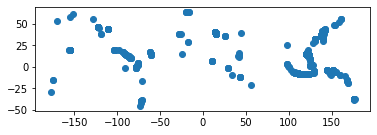

In [90]:
# Make a static plot
gdf.plot()

# Convert it to interactive leaflet 
#mplleaflet.show()


## Create a map in Folium

In [7]:
# first create a map instance
m = folium.Map(location=[0, 140], zoom_start=3, control_scale=True)
#m

In [8]:
# You can save this map to an html
output_fp = 'fatalities_map.html'
m.save(output_fp)

In [9]:
# Convert GeoDataFrames to geoJSON to add them to the basemap
data_gjson = folium.features.GeoJson(gdf, name='Volcanic fatalities')

In [10]:
# Check the GeoJSON features - prints ALL rows of the dataset
#data_gjson.data.get('features')

# Add points to the previously empty map

In [63]:
# Create the map instance 
m = folium.Map(location=[0,15], zoom_start=2, control_scale=True)

# Add the data to the map
data_gjson.add_to(m)
folium.LayerControl().add_to(m)
#m

# Turn the points into a points cluster

In [16]:
from folium.plugins import MarkerCluster

In [95]:
size = len(gdf)
lons = gdf["geometry"].apply(lambda geom: geom.x)
lats = gdf["geometry"].apply(lambda geom: geom.y)

locations = list(zip(lats, lons))
fatalities = gdf['Number of fatalities']
years = gdf['Eruption start year']
volcanoes = gdf['Volcano Name']

In [119]:
# Create the map instance 
m = folium.Map(location=[0,15], zoom_start=3, control_scale=True)#tiles='stamenterrain'

marker_cluster = MarkerCluster(
    name= 'Fatal Volcanic Events',
    overlay=True,
    control=True,
    icon_create_function=None
)

for k in range(size):
    location = lats[k], lons[k]
    marker = folium.Marker(location=location)
    popup = 'Volcano:{}<br>Fatalities:{}<br>Year:{}'.format(volcanoes[k],fatalities[k], years[k])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
    
marker_cluster.add_to(m)

folium.LayerControl().add_to(m)
m

In [118]:
# You can save this map to an html
output_fp = 'Volcano_fatalities.html'
m.save(output_fp)